<a href="https://colab.research.google.com/github/icaiow/analiseVendasMetropoles/blob/main/Analise_vendas_Metropoles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
# Carregando os arquivos Excel com os datasets de diferentes cidades.
aracaju = pd.read_excel("/content/drive/MyDrive/Datasets/Aracaju.xlsx")
fortaleza = pd.read_excel("/content/drive/MyDrive/Datasets/Fortaleza.xlsx")
natal = pd.read_excel("/content/drive/MyDrive/Datasets/Natal.xlsx")
salvador = pd.read_excel("/content/drive/MyDrive/Datasets/Salvador.xlsx")
recife  = pd.read_excel("/content/drive/MyDrive/Datasets/Recife.xlsx")

In [4]:
#Concatenando os dataframes das cidades em um único dataframe chamado 'cidades'.
cidades = pd.concat([aracaju, fortaleza, natal, salvador, recife])

In [5]:
cidades.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
95,Recife,2019-01-01,40.03,982,3
208,Salvador,2019-01-02,39.40,1036,3
29,Fortaleza,2019-01-01,186.29,1005,2
43,Natal,2019-04-01,538.00,853,3
153,Salvador,2019-01-02,17.41,1035,2


In [6]:
#Convertendo a coluna 'LojaID' para o tipo 'object' (string ou categórico).
cidades['LojaID'] = cidades['LojaID'].astype('object')

In [7]:
cidades.dtypes

,0
Cidade,object
Data,datetime64[ns]
Vendas,float64
LojaID,object
Qtde,int64


In [ ]:
# Verificando a quantidade de valores nulos em cada coluna do dataframe.
cidades.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Preenchendo valores nulos na coluna 'Vendas' com a média dos valores dessa coluna.
cidade["Vendas"].fillna(cidades["Vendas"].mean(), inplace=True)

NameError: name 'cidade' is not defined

In [ ]:
# reenchendo valores nulos na coluna 'Vendas' com zero (caso existam valores não preenchidos).
cidades["Vendas"].fillna(0, inplace = True)

In [ ]:
# Criando a coluna 'Receita' que é o resultado da multiplicação entre 'Vendas' e 'Qtde'.
cidades["Receita"] = cidades["Vendas"].mul(cidades["Qtde"])

In [ ]:
#  Obtendo o maior valor da coluna 'Receita'.
cidades['Receita'].max()

3544.0

In [ ]:
# Obtendo o menor valor da coluna 'Receita'.
cidades['Receita'].min()

0.0

In [ ]:
# Calculando a média da coluna 'Receita'.
cidades['Receita'].mean()

387.25484340044744

In [ ]:
# Obtendo as 3 maiores receitas do dataframe.
cidades.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
# Obtendo as 3 menores receitas do dataframe.
cidades.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
3,Aracaju,2018-01-01,0.00,1521,7,0.00
4,Aracaju,2018-01-01,0.00,1522,8,0.00
118,Aracaju,2018-01-01,3.34,1522,1,3.34


In [ ]:
# Agrupando os dados por 'Cidade' e somando as vendas de cada cidade.
cidades.groupby('Cidade')['Vendas'].sum()

Cidade
Aracaju       9445.46
Fortaleza    10120.71
Natal        59187.76
Recife       11119.10
Salvador     19714.40
Name: Vendas, dtype: float64

In [ ]:
#  Agrupando os dados por 'Cidade' e somando a receita de cada cidade.
cidades.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48531.10
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#  Ordenando os dados em ordem crescente pela coluna 'Receita' e mostrando os 10 primeiros resultados.
cidades.sort_values('Receita', ascending= True).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
3,Aracaju,2018-01-01,0.00,1521,7,0.00
4,Aracaju,2018-01-01,0.00,1522,8,0.00
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
95,Salvador,2019-01-01,5.13,1035,1,5.13
95,Natal,2019-01-02,5.13,1035,1,5.13
161,Natal,2019-01-02,5.80,1036,1,5.80
161,Salvador,2019-01-02,5.80,1036,1,5.80


In [ ]:
cidades.dtypes

,0
Cidade,object
Data,int64
Vendas,float64
LojaID,int64
Qtde,int64


In [ ]:
cidades['Data'] = (cidades['Data']).astype('int64')

In [ ]:
cidades['Data'] = pd.to_datetime(cidades['Data'])

In [ ]:
#Agrupando os dados por ano (extraído da coluna 'Data') e somando as receitas de cada ano.
cidades.groupby(cidades['Data'].dt.year)['Receita'].sum()

,Receita
Data,
2018,117959.38
2019,228246.45


In [ ]:
# Criando uma nova coluna 'Ano_Venda' que extrai o ano da coluna 'Data'.
cidades["Ano_Venda"] = cidades["Data"].dt.year

In [ ]:
cidades.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
131,Recife,2019-03-02,139.07,982,6,834.42,2019
147,Natal,2019-01-02,34.50,1035,1,34.50,2019
102,Aracaju,2018-01-01,7.29,1523,1,7.29,2018
109,Aracaju,2018-01-01,51.64,1523,5,258.20,2018
86,Recife,2019-01-01,17.83,982,8,142.64,2019


In [ ]:
# Criando a coluna 'mes_venda' que extrai o mês da coluna 'Data'.
cidades["mes_venda"] = cidades['Data'].dt.month

In [ ]:
# Criando a coluna 'dia_venda' que extrai o dia da coluna 'Data'.
cidades["dia_venda"] = cidades['Data'].dt.day

In [ ]:
cidades.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
128,Natal,2019-01-02,36.84,1034,1,36.84,2019,1,2
41,Natal,2018-05-20,835.00,852,4,3340.00,2018,5,20
40,Fortaleza,2019-02-13,19.13,1002,4,76.52,2019,2,13
183,Salvador,2019-01-02,120.23,1037,2,240.46,2019,1,2
171,Natal,2019-01-02,136.45,1035,3,409.35,2019,1,2


In [ ]:

cidades['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Criando uma nova coluna 'Diferenca_dias' que calcula a diferença entre a data da venda e a primeira data registrada.
cidades['Diferenca_dias'] = cidades['Data'] - cidades['Data'].min()

In [ ]:
cidades.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,Diferenca_dias
169,Salvador,2019-01-02,166.73,1037,2,333.46,2019,1,2,366 days
36,Aracaju,2018-01-01,37.99,1523,8,303.92,2018,1,1,0 days
8,Recife,2019-02-11,56.47,980,6,338.82,2019,2,11,406 days
107,Recife,2019-01-01,15.40,980,7,107.80,2019,1,1,365 days
73,Salvador,2019-01-01,8.39,1037,1,8.39,2019,1,1,365 days


In [ ]:
# Filtrando os dados para obter apenas as vendas realizadas em março de 2019.
vendas_marco_2019 = cidades.loc[(cidades['Data'].dt.year == 2019) & (cidades['Data'].dt.month == 3)]

In [ ]:
# Somando as receitas das vendas realizadas em março de 2019.
vendas_marco_2019['Receita'].sum()

63415.01000000001

In [ ]:
#  Visualizando o dataframe das vendas de março de 2019.
vendas_marco_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita
108,Fortaleza,2019-03-02,152.89,981,4,611.56
109,Fortaleza,2019-03-02,18.90,982,6,113.40
110,Fortaleza,2019-03-02,51.98,983,6,311.88
111,Fortaleza,2019-03-02,8.00,981,3,24.00
112,Fortaleza,2019-03-02,133.59,982,1,133.59
...,...,...,...,...,...,...
137,Recife,2019-03-02,51.99,983,3,155.97
138,Recife,2019-03-02,150.38,983,6,902.28
139,Recife,2019-03-02,141.16,980,7,988.12
140,Recife,2019-03-02,166.89,983,5,834.45


In [ ]:
# Contando a quantidade de vezes que cada 'LojaID' aparece, em ordem crescente.
cidades["LojaID"].value_counts(ascending=True)

,count
LojaID,
1003,20
1521,21
853,26
1004,28
854,28
1523,29
852,29
1002,30
1005,30


<Axes: xlabel='LojaID'>

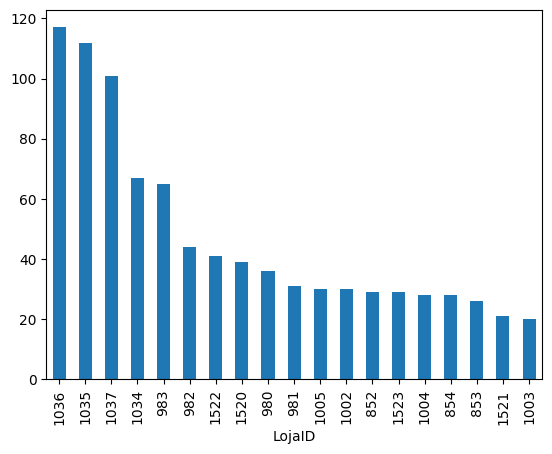

In [ ]:
# Plotando um gráfico de barras com a quantidade de vezes que cada 'LojaID' aparece, em ordem decrescente.
cidades['LojaID'].value_counts(ascending=False).plot.bar()

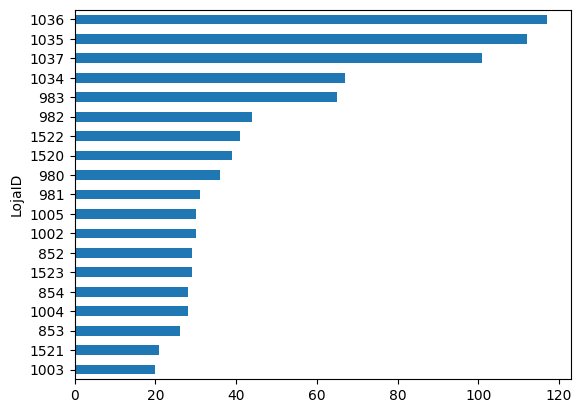

In [ ]:

cidades['LojaID'].value_counts(ascending=True).plot.barh();

<Axes: ylabel='Receita'>

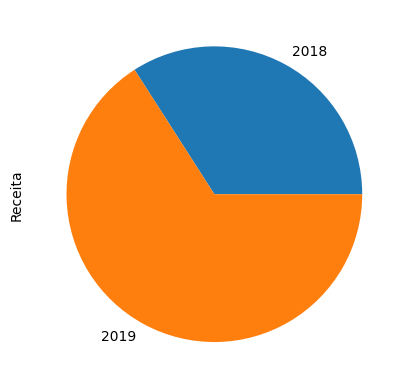

In [ ]:
#  Agrupando os dados por ano (extraído da coluna 'Data') e somando as receitas de cada ano, em um gráfico de pizza.
cidades.groupby(cidades['Data'].dt.year)['Receita'].sum().plot.pie()

In [ ]:
# Contando a quantidade de vezes que cada cidade aparece no dataframe.
cidades['Cidade'].value_counts()

,count
Cidade,
Natal,240
Salvador,240
Fortaleza,142
Recife,142
Aracaju,130


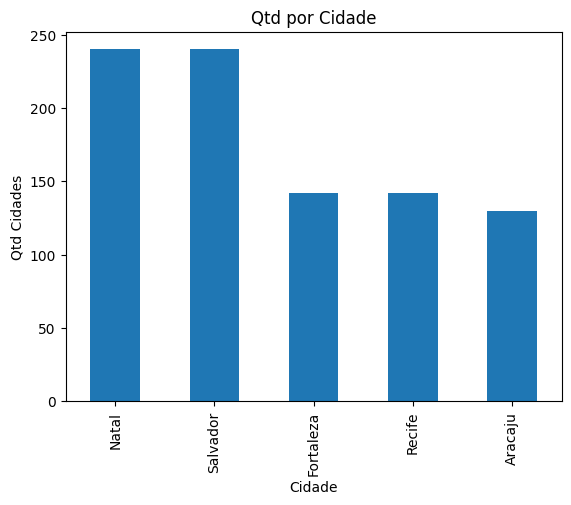

In [ ]:
#  Importando a biblioteca de visualização gráfica Matplotlib e Plotando um gráfico de barras com a quantidade de vendas por cidade.
import matplotlib.pyplot as plt
cidades['Cidade'].value_counts().plot.bar(title = 'Qtd por Cidade');
plt.xlabel('Cidade');
plt.ylabel('Qtd Cidades');

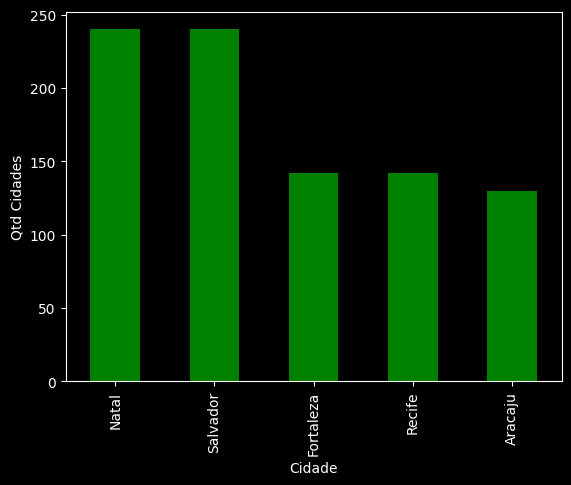

In [ ]:
cidades['Cidade'].value_counts().plot.bar(color = 'green');
plt.xlabel('Cidade');
plt.ylabel('Qtd Cidades');

In [ ]:
cidades.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
177,Salvador,2019-01-02,41.19,1037,2,82.38
191,Salvador,2019-01-02,173.59,1034,2,347.18
21,Fortaleza,2019-01-01,40.63,1004,3,121.89
32,Natal,2019-03-17,244.00,854,2,488.00
111,Salvador,2019-03-02,147.35,1037,2,294.70


In [ ]:
plt.style.use('dark_background')


Text(0, 0.5, 'Vendas')

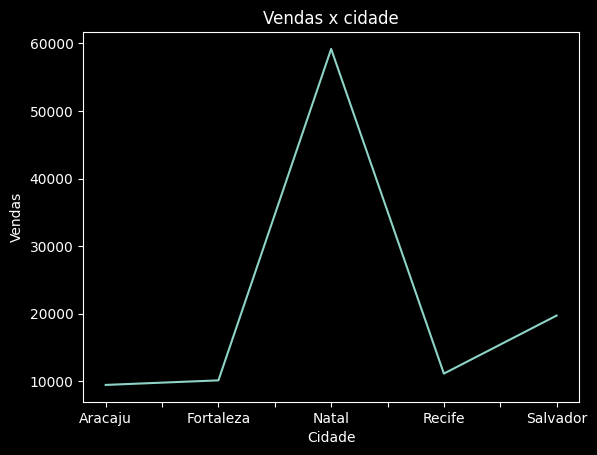

In [ ]:
# Plotando um gráfico de linha com as vendas por cidade.
cidades.groupby(cidades['Cidade'])['Vendas'].sum().plot(title = 'Vendas x cidade')
plt.xlabel('Cidade')
plt.ylabel('Vendas')

In [ ]:
# Filtrando o dataframe para manter apenas os dados de vendas do ano de 2019.
cidades_2019 = cidades[cidades['Ano_Venda'] == 2019]

In [ ]:
cidades_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,mes_venda,dia_venda,Ano_Venda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,1,1,2019
8,Aracaju,2019-01-01,12.16,1523,1,12.16,1,1,2019
9,Aracaju,2019-01-01,149.36,1523,3,448.08,1,1,2019
10,Aracaju,2019-01-01,42.34,1522,6,254.04,1,1,2019
11,Aracaju,2019-01-01,161.53,1520,4,646.12,1,1,2019
...,...,...,...,...,...,...,...,...,...
137,Recife,2019-03-02,51.99,983,3,155.97,3,2,2019
138,Recife,2019-03-02,150.38,983,6,902.28,3,2,2019
139,Recife,2019-03-02,141.16,980,7,988.12,3,2,2019
140,Recife,2019-03-02,166.89,983,5,834.45,3,2,2019


Text(0, 0.5, 'Qtde')

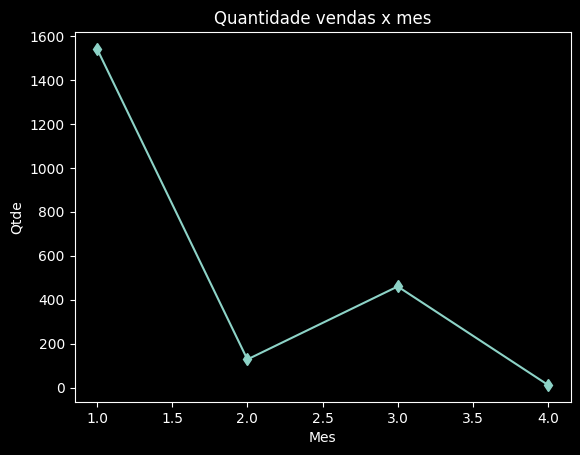

In [ ]:
# Plotando um gráfico de linha com a quantidade de vendas por mês em 2019, com um marcador em formato de losango ('d').
cidades_2019.groupby(cidades_2019['mes_venda'])['Qtde'].sum().plot(title = 'Quantidade vendas x mes', marker = 'd')
plt.xlabel('Mes')
plt.ylabel('Qtde')


<Axes: >

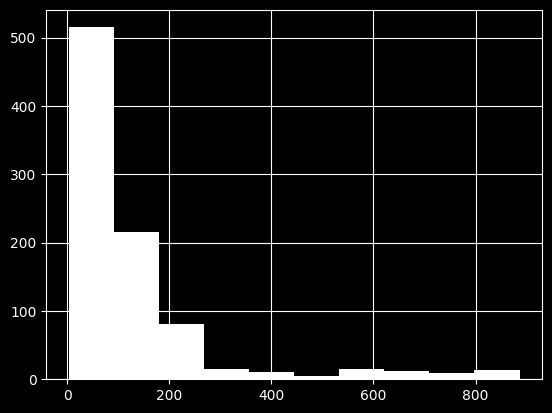

In [ ]:
# Plotando um histograma das vendas
cidades['Vendas'].hist(color = 'white')

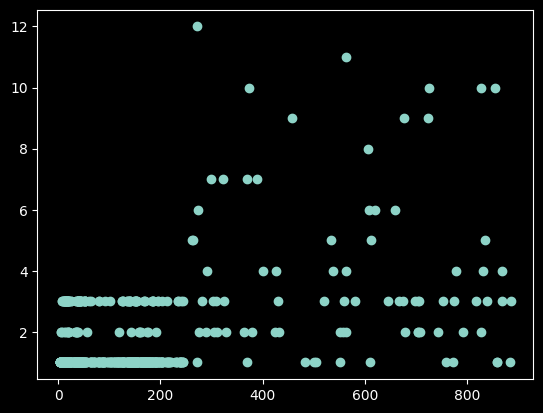

In [ ]:
# Criando um gráfico de dispersão com 'Vendas' no eixo X e 'mes_venda' no eixo Y.
plt.scatter(x=cidades['Vendas'],y=cidades['mes_venda'])

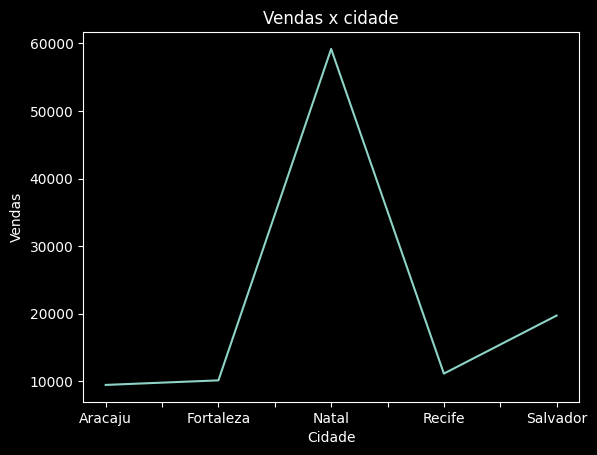

In [ ]:
# Salvando o gráfico atual como uma imagem PNG com o nome
cidades.groupby(cidades['Cidade'])['Vendas'].sum().plot(title = 'Vendas x cidade')
plt.xlabel('Cidade')
plt.ylabel('Vendas')
plt.savefig('Grafico x Cidade.png')